# development work on "shifty"
 - 20191106
 - Helpful to have a notebook around for playing with functionality 

#### Reminder of the contents / types generated when reading a fits file with astropy ...

In [1]:
import astropy
from astropy.io import fits
import numpy as np 
import textwrap
import matplotlib.pyplot as plt

from astropy.time import Time
from astropy.units import allclose as quantity_allclose
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates.builtin_frames import FK5, ICRS, GCRS, GeocentricMeanEcliptic, BarycentricMeanEcliptic, HeliocentricMeanEcliptic, GeocentricTrueEcliptic, BarycentricTrueEcliptic, HeliocentricTrueEcliptic, HeliocentricEclipticIAU76
from astropy.constants import R_sun, R_earth


In [5]:
filepath = '/Users/matthewjohnpayne/.shifty_data/tess/4/1/1/tess2018292095940-s0004-1-1-0124-s_ffic.fits'
obj = fits.open(filepath)
obj[0].header

SIMPLE  =                    T / conforms to FITS standards                     
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T / file contains extensions                       
NEXTEND =                    2 / number of standard extensions                  
EXTNAME = 'PRIMARY '           / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
ORIGIN  = 'NASA/Ames'          / institution responsible for creating this file 
DATE    = '2018-11-14'         / file creation date.                            
TSTART  =    1410.917241951712 / observation start time in TJD                  
TSTOP   =    1410.938075279943 / observation stop time in TJD                   
DATE-OBS= '2018-10-19T09:59:

In [6]:
obj[1].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.1 cal' / name of extension                              
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [7]:
obj[2].header

XTENSION= 'IMAGE   '           / marks the beginning of a new HDU               
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / NAXIS                                          
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
INHERIT =                    T / inherit the primary header                     
EXTNAME = 'CAMERA.CCD 1.1 uncert' / name of extension                           
EXTVER  =                    1 / extension version number (not format version)  
SIMDATA =                    F / file is based on simulated data                
TELESCOP= 'TESS    '           / telescope                                      
INSTRUME= 'TESS Photometer' 

In [8]:
np.shape(obj[0].data), np.shape(obj[1].data), np.shape(obj[2].data)

((), (2078, 2136), (2078, 2136))

In [9]:
obj[1].data, obj[2].data

(array([[ 0.18281528,  0.07671411,  0.1595356 , ...,  0.00712733,
          0.01205946,  0.01674499],
        [ 0.18610774,  0.1343039 ,  0.20602259, ...,  0.04289078,
          0.01402684, -0.02938142],
        [ 0.13516839,  0.11913346,  0.093174  , ...,  0.00564221,
         -0.01113253, -0.03579868],
        ...,
        [ 0.04355072,  0.09161711,  0.06145985, ..., -0.0552806 ,
         -0.07920694, -0.02321625],
        [ 0.06528474,  0.06574507,  0.03978013, ..., -0.14580718,
         -0.11916818, -0.07846712],
        [ 0.09491035,  0.04110625,  0.05460934, ..., -0.07082231,
         -0.10658576, -0.05404757]], dtype=float32),
 array([[0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711468, 0.03711468,
         0.03711468],
        ...,
        [0.03711468, 0.03711468, 0.03711468, ..., 0.03711

In [10]:
print(
    np.percentile(obj[1].data, [0,25,50,75,100] ),
    '\n',
    np.percentile(obj[2].data, [0,25,50,75,100] )
)

[-2.22786808e+01  1.06697315e+02  1.16617645e+02  1.25683958e+02
  1.20802109e+05] 
 [0.         0.32722809 0.34137806 0.35581718 9.54742813]


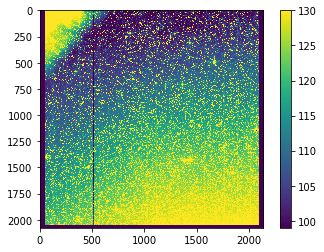

In [11]:
plt.imshow(obj[1].data, vmin=99.00, vmax=130.0)
plt.colorbar()


# Try using the methods and classes in "data" 

In [13]:
import importlib
import data 
import loader

importlib.reload(data)
importlib.reload(loader)


<module 'loader' from '/Users/matthewjohnpayne/Envs/shifty/shifty/loader.py'>

In [14]:
# create loader
T   = loader.TESSImageLoader()
# generate test ImageDataSet 
IDS = T.get_image_data_set( **{'development':True} )

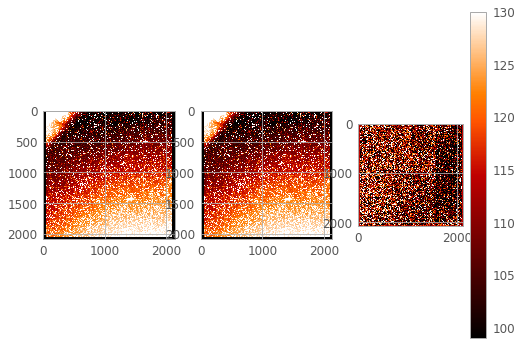

In [70]:
# plot some of the images 

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
fig, ax = plt.subplots(1, 3)
cb = ax[0].imshow(IDS.data[0], vmin=99.00, vmax=130.0)
ax[1].imshow(IDS.data[9], vmin=99.00, vmax=130.0)
ax[2].imshow(IDS.data[9]-IDS.data[0], vmin=-0.50, vmax=0.50)

fig.colorbar(cb)


# Times ...

In [19]:
# remindingmyself how astropy time works ...
time    = Time([2458337.8283571, 2458338.8283571], format='jd', scale='tdb')
time, type(time), len(time)
for _ in time: 
    print(_)
# time from IDS ...
for h in IDS.headers:
    print(h['BJDREFI'], h['BJDREFF'], h['TSTART'], h['TSTOP'])

2458337.8283571
2458338.8283571
2457000 0.0 1410.922486838214 1410.943320166445
2457000 0.0 1410.943320428612 1410.964153756844
2457000 0.0 1410.964154017614 1410.984987345844
2457000 0.0 1410.984987604751 1411.005820932982
2457000 0.0 1411.005821190027 1411.026654518258
2457000 0.0 1411.026654773441 1411.047488101672
2457000 0.0 1411.047488354992 1411.068321683223
2457000 0.0 1411.068321935145 1411.089155263375
2457000 0.0 1411.08915551297 1411.109988841201
2457000 0.0 1411.109989088933 1411.130822417164


# WCS ...

In [80]:
from astropy.wcs import WCS

x_ =  [0,   0, 2135, 2135 , 1045]
y_ =  [0, 2078,   0, 2078 , 1001]
print(
    np.array(WCS(IDS.headers[0]).all_pix2world(x_, y_, 1)).T
)
'''
CRVAL1  =  37.6041907846446150 / RA at CRPIX1, CRPIX2                           
CRVAL2  = -10.8342085542547150 / DEC at CRPIX1, CRPIX2                          
CRPIX1  =               1045.0 / X reference pixel                              
CRPIX2  =               1001.0 / Y reference pixel
NAXIS1  =                 2136 / length of first array dimension                
NAXIS2  =                 2078 / length of second array dimension              
'''

# get the dimensions of the data array 
print( IDS.data[0].shape )

# get the pixel value at x=5, y=2
# https://docs.astropy.org/en/stable/io/fits/usage/image.html
print(IDS.data[0][1, 4])   



[[ 33.75559012 -17.57932487]
 [ 30.0293247   -6.67716909]
 [ 45.53968634 -14.22924391]
 [ 41.71241072  -2.93171714]
 [ 37.60419078 -10.83420855]]
(2078, 2136)
0.06199333


In [219]:
# set up meshgrid 
xx, yy = np.meshgrid(range(np.shape(IDS.data[0])[1]), range(np.shape(IDS.data[0])[0]) )
print(np.shape(IDS.data[0])[1] , np.shape(IDS.data[0])[0], xx.shape, yy.shape )

# calculate & return the RA,DEC values for each pixel
RD  = WCS(IDS.headers[0]).all_pix2world(xx, yy, 1)

len(RD) , RD[0].shape

2136 2078 (2078, 2136) (2078, 2136)


(2, (2078, 2136))

In [218]:
np.array( [ [1,2,3], [2,3,4]] )

array([[1, 2, 3],
       [2, 3, 4]])

In [207]:
xx, yy = np.meshgrid(np.arange(IDS.data[0].shape[1]), np.arange(IDS.data[0].shape[0]))
print(np.shape(IDS.data[0])[1] , np.shape(IDS.data[0])[0], xx.shape, yy.shape )
pix = np.column_stack([xx.flatten(), yy.flatten()])
print(pix.shape)
world = WCS(IDS.headers[0]).wcs_pix2world(pix, 0)
print(world.shape)
ra = world[:, 0].reshape(np.shape(IDS.data[0]))
dec = world[:, 1].reshape(np.shape(IDS.data[0]))
print(ra.shape, dec.shape )

2136 2078 (2078, 2136) (2078, 2136)
(4438608, 2)
(4438608, 2)
(2078, 2136) (2078, 2136)


# RADEC-to-eqUV-to-ecUV

In [230]:
def _RADEC_to_unit( RA_, DEC_):
    '''
        This translates (RA,DEC)  into ...
        ...a unit vector (still in Equatorial coords)

        Inputs:
        -------
        RA_, DEC_ : iterables of floats
         - assumed in degrees & assumed in Equatorial coords

        Returns:
        --------
        UV_ : numpy array of shape == (3,len(RA_))
         - unit vector in Equatorial coords

    '''
    RA_, DEC_ = np.asarray(RA_), np.asarray(DEC_)

    x_ = np.cos(DEC_*np.pi/180.) * np.cos(RA_*np.pi/180.)
    y_ = np.cos(DEC_*np.pi/180.) * np.sin(RA_*np.pi/180.)
    z_ = np.sin(DEC_*np.pi/180.)
    return np.array([x_,y_,z_]).T

def rotate_matrix(ecl):
    ce = np.cos(ecl)
    se = np.sin(-ecl)
    rotmat = np.array([[1.0, 0.0, 0.0],
                       [0.0,  ce,  se],
                       [0.0, -se,  ce]])
    return rotmat
def equatorial_to_ecliptic( v):
    ecl = 84381.448*(1./3600)*np.pi/180.
    rot_mat = rotate_matrix( -ecl )
    return np.matmul(v, rot_mat.T)

In [337]:
from astropy.coordinates.representation import CartesianRepresentation,SphericalRepresentation, UnitSphericalRepresentation

ra = np.ones((4, ), dtype=float) * u.deg
dec = np.arange(1.,5.) * u.deg
distance = np.ones((4, ), dtype=float) * u.au
print('ra', ra)
print('dec', dec)

# old method 
eqUV = _RADEC_to_unit(ra, dec)
print('eqUV', eqUV)
ecUV = equatorial_to_ecliptic(eqUV)
print('ecUV',ecUV )

# new method 
c = SkyCoord(ra=ra, dec=dec, frame='icrs')
print('c', c, type(c))
eqUV = c.represent_as(UnitSphericalRepresentation).represent_as(CartesianRepresentation)
print('eqUV',eqUV, type(eqUV) )

backtoSky = eqUV.represent_as(UnitSphericalRepresentation)
print('backtoSky:',backtoSky )
backtoSky.representation_type = 'spherical'
print('backtoSky:',backtoSky )

bme = c.barycentricmeanecliptic
print('bme',bme)
ecUV = bme.represent_as(UnitSphericalRepresentation).represent_as(CartesianRepresentation)
print('ecUV =  ' , ecUV, type(ecUV))


CC=SkyCoord( *eqUV.get_xyz(), representation_type='cartesian')
print('CC:',CC, type(CC))


c = SkyCoord(x=1, y=2, z=3, representation_type='cartesian')
print(c, type(c)) 

c.representation_type = 'cylindrical'
print(c, type(c)) 

c.representation_type = 'spherical'
print(c, type(c)) 

c.representation_type = 'unitspherical'
print(c, type(c)) 



ra [1. 1. 1. 1.] deg
dec [1. 2. 3. 4.] deg
eqUV [[0.99969541 0.01744975 0.01745241]
 [0.99923861 0.01744177 0.0348995 ]
 [0.99847744 0.01742849 0.05233596]
 [0.99741212 0.01740989 0.06975647]]
ecUV [[0.99969541 0.022952   0.00907116]
 [0.99923861 0.02988474 0.02508172]
 [0.99847744 0.03680837 0.04108465]
 [0.99741212 0.0437208  0.05707506]]
c <SkyCoord (ICRS): (ra, dec) in deg
    [(1., 1.), (1., 2.), (1., 3.), (1., 4.)]> <class 'astropy.coordinates.sky_coordinate.SkyCoord'>
eqUV [(0.99969541, 0.01744975, 0.01745241),
 (0.99923861, 0.01744177, 0.0348995 ),
 (0.99847744, 0.01742849, 0.05233596),
 (0.99741212, 0.01740989, 0.06975647)]  <class 'astropy.coordinates.representation.CartesianRepresentation'>
backtoSky: [(0.01745329, 0.01745329), (0.01745329, 0.03490659),
 (0.01745329, 0.05235988), (0.01745329, 0.06981317)] rad
backtoSky: [(0.01745329, 0.01745329), (0.01745329, 0.03490659),
 (0.01745329, 0.05235988), (0.01745329, 0.06981317)] rad
bme <SkyCoord (BarycentricMeanEcliptic: equinox

True

# Rotation matrices ...

In [263]:
from astropy.coordinates.matrix_utilities import rotation_matrix, matrix_product
#https://docs.astropy.org/en/stable/api/astropy.coordinates.CartesianRepresentation.html
#https://github.com/astropy/astropy/blob/master/astropy/coordinates/matrix_utilities.py

def calculate_rotation_matrix( ref_vec):
    ''' This routine returns the 3-D rotation matrix for the
        given reference vector.
        # rot_mat is a rotation matrix that converts from ecliptic
        # vectors to the projection coordinate system.
        # The projection coordinate system has z outward,
        # x parallel to increasing ecliptic longitude, and
        # y northward, making a right-handed system
        
        HeliocentricClusteringUtilitiesSingleDetections.py
        
        '''
    x_ref, y_ref, z_ref = ref_vec
    r = np.sqrt(x_ref*x_ref + y_ref*y_ref + z_ref*z_ref)
    lon0 = np.arctan2(y_ref, x_ref)
    lat0 = np.arcsin(z_ref/r)
    slon0 = np.sin(lon0)
    clon0 = np.cos(lon0)
    slat0 = np.sin(lat0)
    clat0 = np.cos(lat0)

    rot_mat = np.array([[-slon0, clon0, 0],
                        [-clon0*slat0, -slon0*slat0, clat0],
                        [clon0*clat0, slon0*clat0, slat0 ]])
    return rot_mat


In [316]:
vecs = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1],
    [1,1,1],
    ])

# set up rot-matrix using astropy utility
rotation = rotation_matrix(45 * u.deg, axis=[1,1,0])
print( rotation, type(rotation) )

rep = CartesianRepresentation(vecs[0])
print('rep', rep)

# set up rot-matrix using Holmans/Paynes func
rotation = calculate_rotation_matrix( CartesianRepresentation([0.99903862, 0.02908477, 0.02008163]).get_xyz()  )
print( rotation, type(rotation) )
print('rotated vectors ...\n', np.dot(rotation, vecs[0] ) )
print('rotated rep ...\n', rep.transform(rotation)  )


# now try operating on the ecUV from above 
print('ecUV ...\n' , ecUV, '\n',type(ecUV))
theta = ecUV[0].transform(rotation)
print()
print(theta, type(theta))

[[ 0.85355339  0.14644661 -0.5       ]
 [ 0.14644661  0.85355339  0.5       ]
 [ 0.5        -0.5         0.70710678]] <class 'astropy.units.quantity.Quantity'>
rep (1., 0., 0.) 
[[-2.91004290e-02  9.99576493e-01  0.00000000e+00]
 [-2.00798797e-02 -5.84580687e-04  9.99798208e-01]
 [ 9.99374786e-01  2.90945567e-02  2.00883873e-02]] <class 'numpy.ndarray'>
rotated vectors ...
 [-0.02910043 -0.02007988  0.99937479]
rotated rep ...
 (-0.02910043, -0.02007988, 0.99937479) 
ecUV ...
 [(0.99969541, 0.02295203, 0.00907106),
 (0.99923862, 0.02988477, 0.02508163),
 (0.99847744, 0.0368084 , 0.04108455),
 (0.99741212, 0.04372082, 0.05707496)]  
 <class 'astropy.coordinates.representation.CartesianRepresentation'>

(-0.00614925, -0.01101795, 0.99992039)  <class 'astropy.coordinates.representation.CartesianRepresentation'>


# Frames / Coords

In [11]:
ra = np.ones((4, ), dtype=float) * u.deg
dec = 2*np.ones((4, ), dtype=float) * u.deg
distance = np.ones((4, ), dtype=float) * u.au
test_icrs = ICRS(ra=ra, dec=dec, distance=distance)
bary_arr = test_icrs.transform_to(BarycentricMeanEcliptic)


In [12]:
ra, dec

(<Quantity [1., 1., 1., 1.] deg>, <Quantity [2., 2., 2., 2.] deg>)

In [13]:
test_icrs

<ICRS Coordinate: (ra, dec, distance) in (deg, deg, AU)
    [(1., 2., 1.), (1., 2., 1.), (1., 2., 1.), (1., 2., 1.)]>

In [14]:
bary_arr

<BarycentricMeanEcliptic Coordinate (equinox=J2000.000): (lon, lat, distance) in (deg, deg, AU)
    [(1.71306506, 1.43722201, 1.), (1.71306506, 1.43722201, 1.),
     (1.71306506, 1.43722201, 1.), (1.71306506, 1.43722201, 1.)]>

In [32]:
T = data.TESSImageLoader()
HDUs = T._load_images('DEV')
r = [0.,90.,180., 270.,   0.,  0.,  90., 90., 0.,90.,180.,270.]
d = [0., 0.,  0.,   0., -90., 90., -90., 90.,45.,45., 45., 45.]
uv = data.ImageDataSet(HDUs,'C57')._RADEC_to_unit(r,d)
print(uv)
expected_uv = np.array(
[
    [1,0,0],
    [0,1,0],
    [-1,0,0],
    [0,-1,0],
    [0,0,-1],
    [0,0,1],
    [0,0,-1],
    [0,0,1],
    [1/np.sqrt(2),0,1/np.sqrt(2)],
    [0,1/np.sqrt(2),1/np.sqrt(2)],
    [-1/np.sqrt(2),0,1/np.sqrt(2)],
    [0,-1/np.sqrt(2),1/np.sqrt(2)],
]
)
assert np.allclose( uv , expected_uv) 


[  0.  90. 180. 270.   0.   0.  90.  90.   0.  90. 180. 270.] [  0.   0.   0.   0. -90.  90. -90.  90.  45.  45.  45.  45.]
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.12323400e-17  1.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  1.22464680e-16  0.00000000e+00]
 [-1.83697020e-16 -1.00000000e+00  0.00000000e+00]
 [ 6.12323400e-17  0.00000000e+00 -1.00000000e+00]
 [ 6.12323400e-17  0.00000000e+00  1.00000000e+00]
 [ 3.74939946e-33  6.12323400e-17 -1.00000000e+00]
 [ 3.74939946e-33  6.12323400e-17  1.00000000e+00]
 [ 7.07106781e-01  0.00000000e+00  7.07106781e-01]
 [ 4.32978028e-17  7.07106781e-01  7.07106781e-01]
 [-7.07106781e-01  8.65956056e-17  7.07106781e-01]
 [-1.29893408e-16 -7.07106781e-01  7.07106781e-01]]


# Experiment with wcs . all_pix2world